In [40]:
# See for a better viewing angle and maybe different axes limits in fig2

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipywidgets as widgets
import warnings

This is a beginner's tutorial. If you play with the concepts in this tutorial, you can go from knowing next to nothing about linear algebra to an intuition that will help with multiple linear regression.

*M.N. Shadlen* for Cold Spring Harbor 1998 <br>
Translated into Python by *Chrysa Papadaniil* 9/21.<br>

Let's suppose that you have ordered pairs:

In [42]:
data = np.array([[-1, 1], [1, 1], [2, 3]])
print(data)

[[-1  1]
 [ 1  1]
 [ 2  3]]


Our job is to find the best fitting line for these three points. Here are the points:

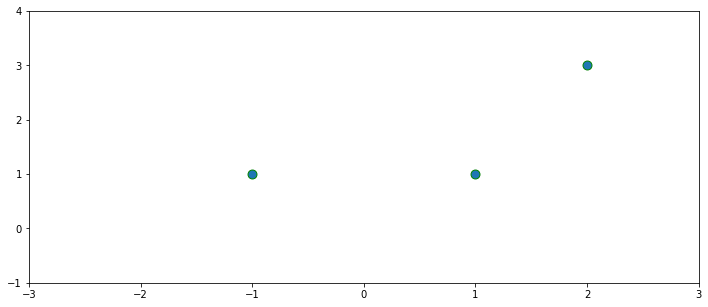

In [43]:
plt.figure(figsize=(12,5))
plt.scatter(data[:,0], data[:,1], s=80, marker = 'o', edgecolors='g')
plt.ylim(-1,4)
plt.xlim(-3,3)
plt.show()

We are going to set this up as a matrix equation.

$$
Ax = b.
$$

The term $x$ is somewhat unfortunate because $x$ is not the independent variable, but the constant and slope. $b$ is almost as unfortunate since many of us think of $b$ as the slope of a line.  Here it is the value plotted on the ordinate. Let's start by making $A$.  It is a 3 x 2  matrix.

In [44]:
A = np.ones((3,2))
A[:,1] = data[:,0]

Notice that the first column of A is just a column of ones. The second column contains the values plotted on the abscissa -- what we would normally call the $x$-variable: the values -1 1 2. To avoid confusion, let's call the "$x$-values" $a$

In [45]:
a = data[:,0]

Let's call the "$y$-values" vector $b$

In [46]:
b = data[:,1]

We know $A$ and we know $b$.  We want to find the best solution for $x$. The first thing you need to convince yourself of is that the 2 by 1 column vector, $x$, contains the constant and slope of the best fitting line. This is a good time to remind yourself of how a matrix multiplies a vector.

Let's take a wild guess at $x$.  Let's guess that the intercept is .5 and the slope is 1

In [47]:
x = np.transpose([.5, 1])

Notice that you get out 3 values from $Ax$

In [48]:
b_guess = A.dot(x)
print(b_guess)

[-0.5  1.5  2.5]


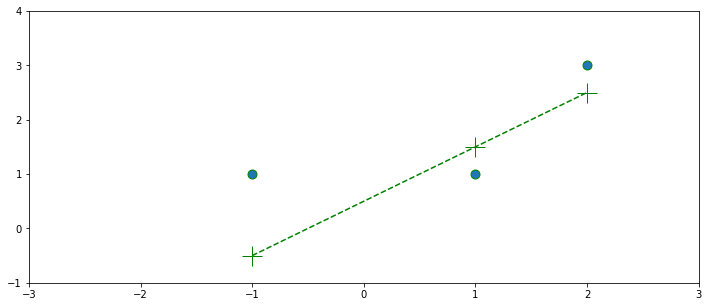

In [49]:
#Plot it 
plt.figure(figsize=(12,5))
plt.scatter(a, b, s=80, marker = 'o', edgecolors='g')
plt.plot(a, b_guess, 'g+--', markersize=20)
plt.ylim(-1,4)
plt.xlim(-3,3)
plt.show()

That's a pretty crummy fit, but that's not the point. All you're supposed to see right now is that by going across the rows of $A$ and down the column vector $x$, you get the equation:

$$
A[0,0]*x[0] + A[0,1]*x[1]\\
A[1,0]*x[0] + A[1,1]*x[1]\\
A[2,0]*x[0] + A[2,1]*x[1]\\
$$

If you don't understand that last equation, stop.  There's no point in going any further. Ask for help or pick up a book. If you understand the equation, then ask yourself the following. Suppose we made $A$ as a column of 1s, a column like $A[:,1]$ and a third column of the squares:  $A[:,2] = A[:,1]*A[:,1]$. We would be looking for a column vector, $x$, that has 3 components. Do you see that these are the coefficients of the best fitting quadratic? $x0 + x1*a + x2*a^2 = b$. Best to convince yourself of that too before going on.

Now this way of setting up the equation jives with your sense of matrix times vector by going along the rows of the matrix and multiplying the elements by those going down the column vector. Another way to put that is that each element in $b$ is a dot-product of the corresponding row in $A$ with the column vector $x$. That's worth thinking about, but it does not lend itself to a particularly lucid view of the regression problem.  For this, it is worth thinking about the matrix times the vector in a different way. Instead of going along the rows of $A$, consider the columns.  This is actually the easier way to think about it. Notice that $b$ is the same dimension as a column in $A$ (3 by 1). Convince yourself that $b$ is just the weighted sum of the columns in $A$. The weights come from the elements of $x$.

In [50]:
b_guess = x[0]*A[:,0] + x[1]*A[:,1]
print(b_guess)

[-0.5  1.5  2.5]


Again, it's not worth going on if you don't see this version of $A*x$. 

Now here is where things start getting interesting. Once we recognize that $b$ is the weighted sum of just 2 vectors,  it must be the case that b lies in the plane that these vectors define. No matter how you cut it, you can only find vectors, $b$, that you can get to by adding the two vectors that form the columns of $A$. This plane is called the column-space of $A$. It includes the origin.

It helps to look at a picture.  The way I'm going to draw this picture includes a step or two that we're not ready for. Just execute it for the time being. Later, we'll come back to why the matrix algebra works.

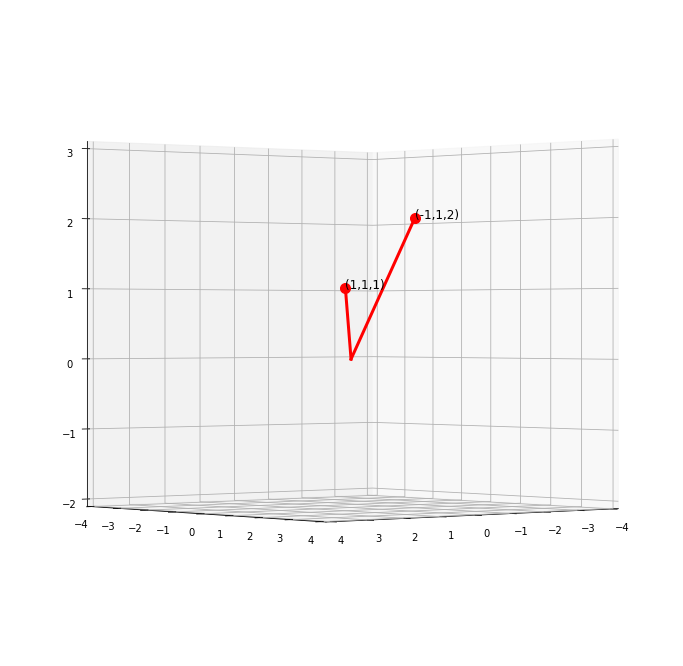

In [51]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
plt.show()

You can imagine the plane:

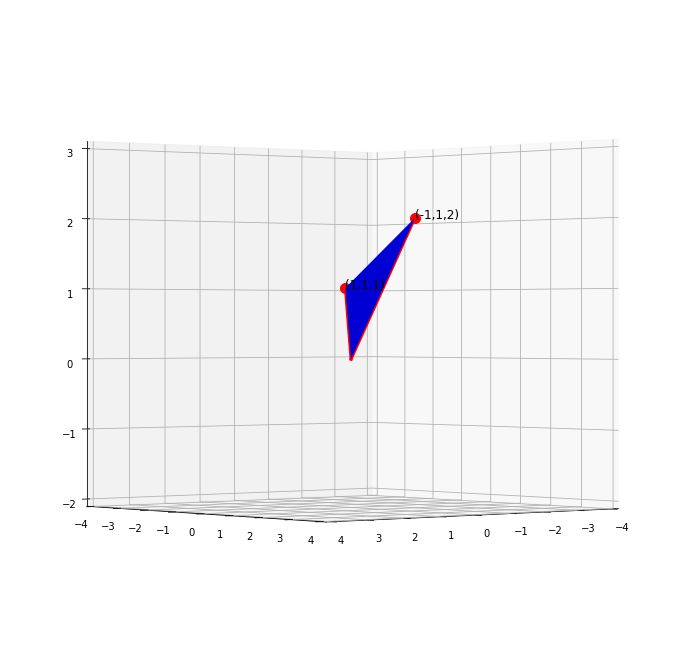

In [52]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.plot_trisurf((0, A[0,0] ,A[0,1]), (0, A[1,0], A[1,1]), (0, A[2,0], A[2,1]),  color = 'blue')
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
plt.show()

Now here's the part that you need to ignore for a moment. The next line makes a projection matrix. We're going to use it to project the $xy$ plane into the column space of $A$.

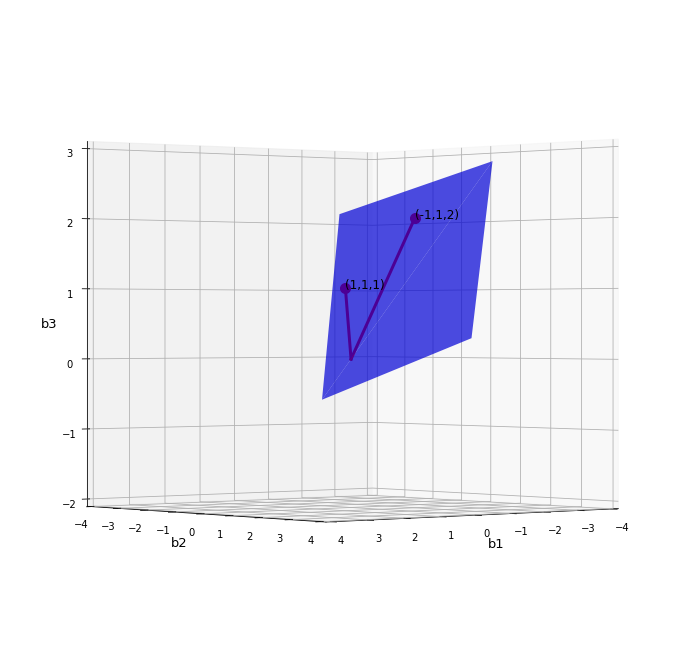

In [53]:
P = (A.dot(np.linalg.inv(np.transpose(A).dot(A)))).dot(np.transpose(A)) # A * inv(A'*A) * A'
q = 2*P.dot(np.array([[1, 1, -2, -2, 1], [1, -2, -2, 1 , 1], [1, 1, 1, 1, 1]]))

#Plot it
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
ax.set_xlabel('b1', fontsize=13)
ax.set_ylabel('b2', fontsize=13)
ax.set_zlabel('b3', fontsize=13)
plt.show()

You can try the above in interactive mode with `%matplotlib qt`. This will plot our plane in a pop-up window. Then, you can try rotating the plot to view the plane from different angles. (To go back to non-interactive plots within the notebook, you have to use `%matplotlib inline`)

In [15]:
%matplotlib qt 
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
ax.set_xlabel('b1', fontsize=13)
ax.set_ylabel('b2', fontsize=13)
ax.set_zlabel('b3', fontsize=13)
plt.show()

Or you can try a widget to see some different angles:

In [16]:
%matplotlib inline 
@widgets.interact(angle=widgets.IntSlider(min=-90, max=90, step=10))
def plot_plane(angle):
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
    plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
    plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
    ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
    ax.text(1, 1, 1, '(1,1,1)', size = 'large')
    ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
    ax.view_init(angle,50)
    plt.ylim(-4,4)
    plt.xlim(-4,4)
    ax.set_zlim(-2,3)
    ax.set_xlabel('b1', fontsize=13)
    ax.set_ylabel('b2', fontsize=13)
    ax.set_zlabel('b3', fontsize=13)
    plt.show()

interactive(children=(IntSlider(value=0, description='angle', max=90, min=-90, step=10), Output()), _dom_class…

Are you convinced that no matter what we guess for our solution, $x$, we will end up with something in the plane? You should have convinced yourself of this earlier. But here is a quick demo.

It is important to realize that any guess we make for the answer to our problem will make a vector in the plane spanned by $A$'s column vectors.
We'll make 5 random guesses for $g$ and see what we get out.

In [17]:
%matplotlib qt 
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
ax.set_xlabel('b1', fontsize=13)
ax.set_ylabel('b2', fontsize=13)
ax.set_zlabel('b3', fontsize=13)

for i in range(1,5):
    g = 2*(np.random.rand(2,1) - 0.5)
    res = A.dot(g)
    ax.plot3D(res[0],res[1],res[2],'c*', markersize =9)
    plt.plot((0, res[0]), (0, res[1]), (0, res[2]), 'c', lw = 3)
plt.show()

//anaconda3/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)
//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different

Now that you have convinced yourself that no matter what we choose for $x$, we are going to get out (after multiplication by $A$) a  vector that lies in the plane. That is unfortunate because the perfect solution would be the vector $b$, and it is usually the case that $b$ does not lie in our plane! What a bummer. But then again, if it did, we would have a perfect solution -- and that's not what we're dealing with in least squares.

Let's look at the vector $b$ (rotate the plot to see it better).  Remember this is the list of ordinate values for the points in our first plot.

In [18]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
ax.set_xlabel('b1', fontsize=13)
ax.set_ylabel('b2', fontsize=13)
ax.set_zlabel('b3', fontsize=13)

ax.plot3D([b[0]], [b[1]] , [b[2]] ,'g*', markersize =9) #Latest addition
plt.plot((0, b[0]), (0, b[1]), (0, b[2]), 'g', lw=3)  #Latest addition

plt.show()

So now what? Clearly $b$ is not in the column space of $A$. Yet no matter what we choose for $x$, we will get a set of predicted values that form a vector that is in the column-space. Of course we want to find x so that the vector we get out is the closest one to the real solution.  

Let's call the solution $x\_bar$.  After all, there is no vector $x$, such that $A*x = b$.


Now from the picture in front of you, it ought to be obvious that the closest we can get to $b$ is a vector that ends in the projection of $b$ on the blue plane. I'm going to drop the end of vector $b$ onto the plane. Try to ignore the math for the moment and grasp the geometry.  

In [19]:
b_proj = ((A.dot(np.linalg.inv(np.transpose(A).dot(A)))).dot(np.transpose(A))).dot(b)

#Plot it
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
ax.set_xlabel('b1', fontsize=13)
ax.set_ylabel('b2', fontsize=13)
ax.set_zlabel('b3', fontsize=13)

ax.plot3D([b[0]], [b[1]] , [b[2]] ,'g*', markersize =9)
plt.plot((0, b[0]), (0, b[1]), (0, b[2]), 'g', lw=3) 
plt.plot((0, b_proj[0]), (0, b_proj[1]), (0, b_proj[2]), 'g--', lw=5) #Latest addition

plt.show()

The thick broken line is the projection of b onto the column-space of $A$.  Let's call this vector $b\_proj$. It is the predicted value that we would get out of $A*x\_bar = b\_proj$. One way to see this is to return to the first plot and look at where $b\_proj$ lies. These are the green asterisks connected by the green broken line.  

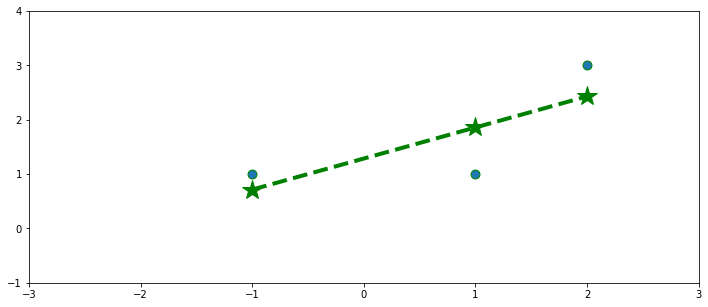

In [20]:
%matplotlib inline 

#Plot it 
plt.figure(figsize=(12,5))
plt.scatter(data[:,0], data[:,1], s=80, marker = 'o', edgecolors='g')
plt.plot(a, b_proj, 'g*--', markersize=20, lw=4)
plt.ylim(-1,4)
plt.xlim(-3,3)
plt.show()

Our $b\_proj$ is the column vector containing the ordinate values of these three points. You can see that these are the predicted values that lie on the best fitting line. The way that we would say that this is the best fitting line is that the distance from the asterisks to the data values (vertically) is minimized.

This distance is the difference between $b$ and $b\_proj$.<br>
Let's return to the vector diagram and convince ourselves.

Visualizing this error vector is the key to understanding least squares.

It helps to construct a line that represents the error between $b$ and $b\_proj$.  The error, $err$, is:

In [21]:
err = b - b_proj
print(err.shape)

(3,)


Let's add a second dimension and make it a column vector to help us with the math later on:

In [22]:
err = np.expand_dims(err, axis=1)
print(err.shape)

(3, 1)


Rather than displaying this vector emanating from the origin, we will add it to the end of $b\_proj$:

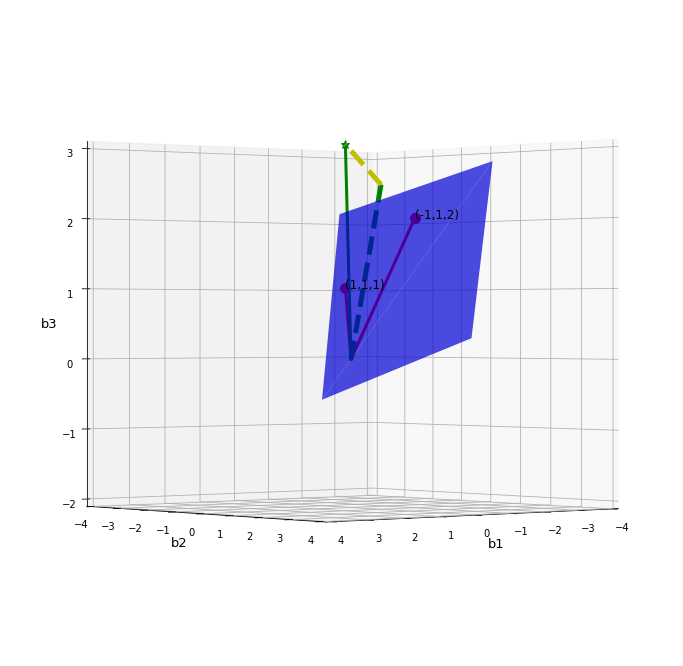

In [23]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot3D(A[0,:],A[1,:],A[2,:], 'ro', markersize =10)
plt.plot((0, A[0,0]), (0, A[1,0]), (0, A[2,0]), 'r', lw = 3)
plt.plot((0, A[0,1]), (0, A[1,1]), (0, A[2,1]), 'r', lw = 3)
ax.plot_trisurf(q[0,:], q[1,:], q[2,:],  color = 'b', alpha = 0.7)
ax.text(1, 1, 1, '(1,1,1)', size = 'large')
ax.text(-1, 1, 2, '(-1,1,2)', size = 'large')
ax.view_init(0,50)
plt.ylim(-4,4)
plt.xlim(-4,4)
ax.set_zlim(-2,3)
ax.set_xlabel('b1', fontsize=13)
ax.set_ylabel('b2', fontsize=13)
ax.set_zlabel('b3', fontsize=13)

ax.plot3D([b[0]], [b[1]] , [b[2]] ,'g*', markersize =9)
plt.plot((0, b[0]), (0, b[1]), (0, b[2]), 'g', lw=3) 
plt.plot((0, b_proj[0]), (0, b_proj[1]), (0, b_proj[2]), 'g--', lw=5) 
plt.plot((b_proj[0], b[0]), (b_proj[1], b[1]), (b_proj[2], b[2]), 'y--', lw=5) #Latest addition

plt.show()

Do you appreciate that this $err$ vector is orthogonal to the plane? There are lots of ways to talk about this, but you have to see and believe it first. Feel free to make the above plot interactive if it helps you see it better. Don't go on unless you are absolutely comfortable with the idea that $err$ is orthogonal to the plane spanned by the columns of $A$.

O.K., you made it. Do you see that regardless of the dimension of the problem, the least squares solution will be a projection of some high dimensional vector, $b$, on some lower dimensional column space of $A$. Sticking with the 2-dimensional case, if we were fitting a line to 4 points instead of 3, we would be projecting a 4-dimensional vector, $b$, into the 2-dimensional plane spanned by the 2 4-dimensional column vectors of $A$.  One of these would be [1 1 1 1]'.   

Let's return to the matter of $err$ and how to talk about it. We have already said that it is orthogonal to the columns of $A$. That means that the dot product of $err$ with any column of $A$ should be zero. Since $err$ is a column vector, we either have to take its transpose and multiply with $A$:

In [24]:
print(np.transpose(err).dot(A[:,0]))     # 1st column 
print(np.transpose(err).dot(A[:,1]))     # 2nd column 

[8.8817842e-16]
[1.77635684e-15]


or take the transpose of the column vectors and multiply these with the $err$ column vector

In [25]:
print(np.transpose(A[:,0]).dot(err))     # 1st column 
print(np.transpose(A[:,1]).dot(err))     # 2nd column 

[8.8817842e-16]
[1.77635684e-15]


I'm assuming you know about dot products.  If you don't, you'll have to pick up a book. You might just recall that it is the product  of the lengths times the cosine of the angle between the vectors. So $z'*z$ is the square of the length of $z$.  You can easily verify that the dot product of two orthogonal vectors is 0 <br>e.g., visualize and compute

In [26]:
print(np.array([1,0]).dot(np.transpose([0, 1]))) # [1 0] * [0 1]'
print(np.array([1,1]).dot(np.transpose([-1, 1])))
print(np.array([1,1]).dot(np.transpose([-2.7, 2.7]))) # [1 0] * [0 1]'

0
0
0.0


...and so forth.
 
If you don't understand dot products (sometimes called inner products) don't go on. 

If you understand the notion of inner products and the fact that $err$ is orthogonal to the columnspace of $A$, then we can move on. The first thing to say is that we can combine the dot products above into a single matrix operation.<br> The  following

In [27]:
print(np.transpose(err).dot(A))

[[8.88178420e-16 1.77635684e-15]]


should be a row vector with two 0s. (You get very tiny numbers).

Or we can transpose $A$ and multiply it times the $err$ column vector

In [29]:
print(np.transpose(A).dot(err))

[[8.88178420e-16]
 [1.77635684e-15]]


and get a column vector with 2 zeros.

There is a very imporant idea here.  The error vector, which is, after all, the residuals between the observed data and the fit, is orthogonal to the columnspace of $A$.  It lies in the left nullspace of $A$.  The reason  this is called the left nullspace is because we have to left-multiply  $err'*A$ to get our zeros.

Once we see that this is so, we can derive the NORMAL EQUATIONS in matrix form.  We are looking for the best approximation to $x$ in the equation 

$$A*x = b. $$

We have already admitted that there is no vector $x$ that will work because $A*x$ always lies in the columnspace of $A$, whereas $b$ does not.  So, instead, we'll solve for $x\_bar$. We want the best solution to 

$$A*x\_bar = b.$$

Again, we admit we can't achieve equality. So we say that what we really want is to minimize th error between our fit, $A*x\_bar$, and the observed values, $b$. In least squares, we want to minimize the sum of the $(b - A*x\_bar)^{2}$. What you should be absolutely convinced of is that $b - A*x\_bar$ is just the vector err, and that this vector is perpendicular to the columnspace of $A$.   

Start with $err$.  We have already convinced ourselves of the fact that 

$$A' * err = 0$$. 

If you don't remember this, go back to the last code you executed.<br>
But $err$ is just $b - A*x\_bar$ <br>
Substituting for $err$, we get

$$
 		A' * (b - A*x\_bar) = 0
$$

Rearranging, we get 

$$
 		A'*b = A'*A*x\_bar
$$

Remember, we are trying to solve for $x\_bar$. So we multiply both sides of the equation by the inverse of $(A'*A)$

$$
		\text{inv}(A'*A) * A'*b 	= \text{inv}(A'*A) * (A'*A) * x\_bar \\
		\text{inv}(A'*A) * A'*b 	= x\_bar 
$$

or in other words,

In [30]:
x_bar = ((np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A)))).dot(b) #normal equation
print(x_bar)

[1.28571429 0.57142857]


The column vector describes the best fitting line to the data. <br>
1.2857 is the intercept and 0.5714 is the slope. 

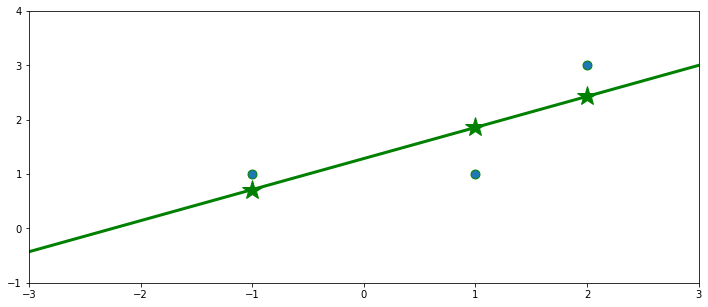

In [31]:
#Plot it 
plt.figure(figsize=(12,5))
plt.scatter(a, b, s=80, marker = 'o', edgecolors='g')
plt.plot(a, b_proj, 'g*', markersize=20, lw=4)

#Here we'll create the line function
axes = plt.gca()
x_vals = np.linspace(-3, 3, 100)  
y_vals = 1.2857 + 0.5714 * x_vals
plt.plot(x_vals, y_vals, 'g', lw=3)

plt.ylim(-1,4)
plt.xlim(-3,3)
plt.show()

Now there is one thing left to appreciate before we extend this to multiple regression. I promised that I would explain the projection matrix we used to make our pretty picture. It would be nice to be able to project a vector onto the columnspace of $A$. Well, we already have one example:  $A * x\_bar$ is the projection of $b$ onto the columnspace.  Now look at what you get when you left-multiply the equation for $x\_bar$ by $A$.

$$
A * x\_bar = A * \text{inv}(A'*A) * A' * b
$$

This leads to a simple idea.  The seemingly messy string of matrices, $A * \text{inv}(A'*A) * A'$, projects $b$ onto the plane in our figure.

In [32]:
P = (A.dot(np.linalg.inv(np.transpose(A).dot(A)))).dot(np.transpose(A)) # A * inv(A'*A) * A'
print(P)

[[ 0.92857143  0.21428571 -0.14285714]
 [ 0.21428571  0.35714286  0.42857143]
 [-0.14285714  0.42857143  0.71428571]]


Earlier in the tutorial, we used $P$ to project the vertices of a square onto the columnspace of $A$. That's how we made the blue plane.

So why is this so cool?  Because it gives us a very easy way to do multiple regression.  Suppose we have the ordered pairs,

In [33]:
data = np.array([
[0,1],
[1,53],
[2,35],
[3,-7],
[4,87],
[5,106],
[6,250],
[7,301],
[8,346],
[9,337],
[10,256],
[11,-25],
[12,-421]
                ])
    
print(data)

[[   0    1]
 [   1   53]
 [   2   35]
 [   3   -7]
 [   4   87]
 [   5  106]
 [   6  250]
 [   7  301]
 [   8  346]
 [   9  337]
 [  10  256]
 [  11  -25]
 [  12 -421]]


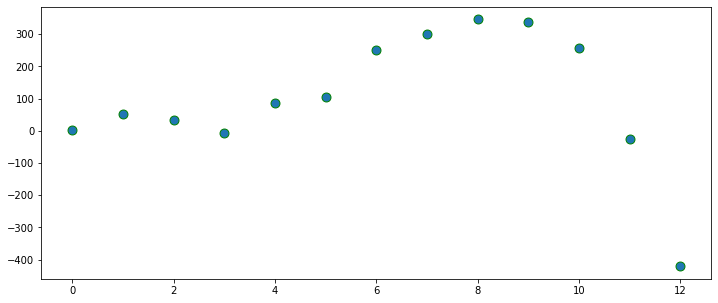

In [34]:
#Plot it 
plt.figure(figsize=(12,5))
plt.scatter(data[:,0], data[:,1], s=80, marker = 'o', edgecolors='g')
plt.show()

We want to fit a 4th order polynomial. The $A$ matrix has 5 columns:

In [35]:
A = np.ones((13,5))
a = data[:,0]
b = data[:,1]

A[:,1] = a
A[:,2] = a**2
A[:,3] = a**3
A[:,4] = a**4

print(A)

[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04]
 [1.0000e+00 1.1000e+01 1.2100e+02 1.3310e+03 1.4641e+04]
 [1.0000e+00 1.2000e+01 1.4400e+02 1.7280e+03 2.0736e+04]]


We want the best solution for $x\_bar$ in the equation $A*x\_bar = b$

In [36]:
x_bar = ((np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A)))).dot(b) 
print(x_bar)

[ 20.24531351   4.48909179 -10.09446558   4.39042575  -0.32028143]


It's that simple.  We can get the fit back with

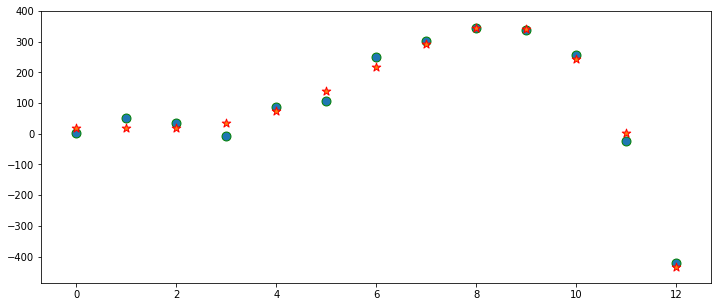

In [37]:
pred_vals = A.dot(x_bar)

#Plot it 
plt.figure(figsize=(12,5))
plt.scatter(a, b, s=80, marker = 'o', edgecolors='g')
plt.scatter(a, pred_vals, s=80, marker = '*', edgecolors='r')
plt.show()

And we can get a predicted curve by increasing the sampling density:

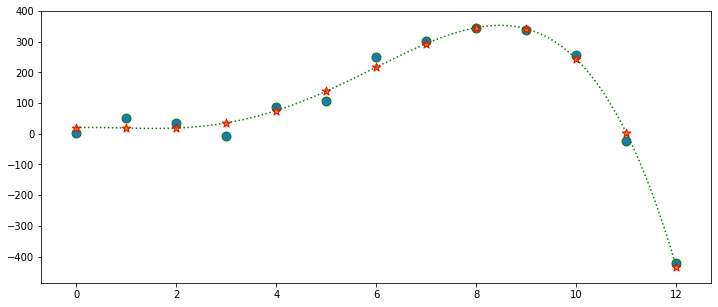

In [38]:
a_dens = np.transpose(np.linspace(min(a),max(a),100))

A_dens = np.ones((100,5))
A_dens[:,1] = a_dens
A_dens[:,2] = a_dens**2
A_dens[:,3] = a_dens**3
A_dens[:,4] = a_dens**4

pred_vals_dens = A_dens.dot(x_bar)

#Plot it 
plt.figure(figsize=(12,5))
plt.scatter(a, b, s=80, marker = 'o', edgecolors='g')
plt.scatter(a, pred_vals, s=80, marker = '*', edgecolors='r')
plt. plot(a_dens,pred_vals_dens,'g:')
plt.show()

In [39]:
max(a)

12